In [2]:
##--Aula 06--##
##-- continuação da aula 05: operações com raster

##--Pacotes aqui--##
library(raster)
library(sf)
library(terra)

Carregando pacotes exigidos: sp

Linking to GEOS 3.13.0, GDAL 3.10.2, PROJ 9.5.1; sf_use_s2() is TRUE

terra 1.8.29



In [1]:
##--obtendo a imagem no pc--##
manaus_landsat <- "/home/huguinho/Documents/GitHub/introduction_to_geo_statistics/aula_06/file355848e93aae.tif"

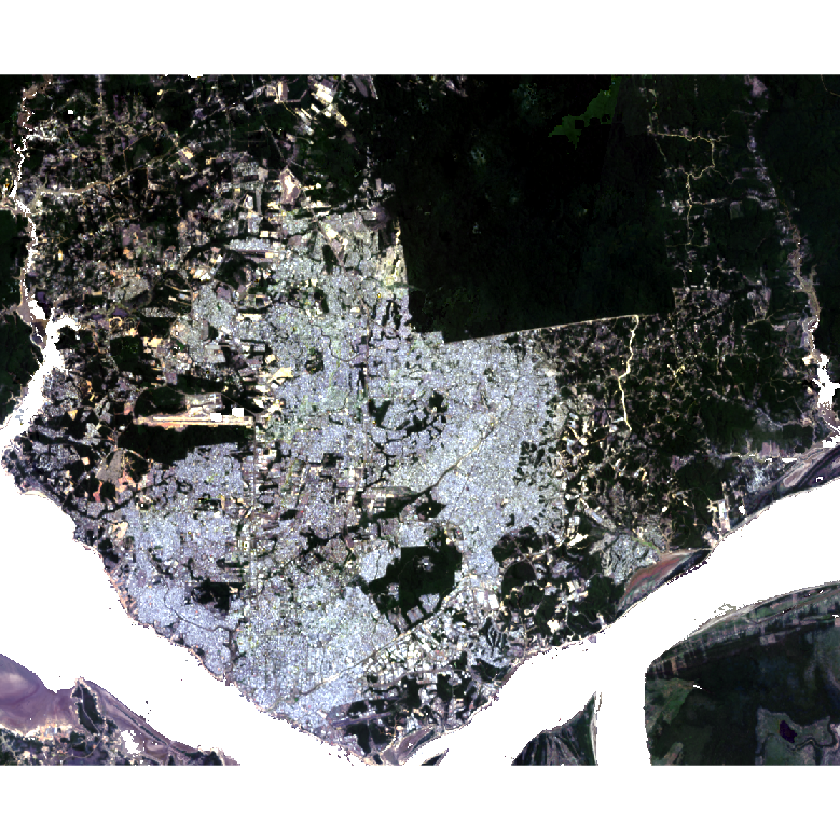

In [3]:

##--explorando a imagem com o pacote raster--## 
manaus_landsat_rast <- raster::brick(manaus_landsat)
plotRGB(manaus_landsat_rast, r=4, g=3, b=2, stretch="lin")

In [12]:

##--operação mask para ajuste de imagens--##
#--obtendo a mascara de manaus--#
shp_path <- file.path("/home/huguinho/Documents/GitHub/introduction_to_geo_statistics/Bairros/Bairros/AreaUrbanaTotalBairrosManaus_UTMSIRGAS2000_pol.shp")
manaus_map <- sf::st_read(shp_path)


Reading layer `AreaUrbanaTotalBairrosManaus_UTMSIRGAS2000_pol' from data source 
  `/home/huguinho/Documents/GitHub/introduction_to_geo_statistics/Bairros/Bairros/AreaUrbanaTotalBairrosManaus_UTMSIRGAS2000_pol.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 63 features and 8 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 153580.8 ymin: 9649981 xmax: 186996.9 ymax: 9677469
Projected CRS: SIRGAS 2000 / UTM zone 21S


Warning message in CPL_transform(x, crs, aoi, pipeline, reverse, desired_accuracy, :
“GDAL Error 1: PROJ: proj_create_from_database: crs not found: EPSG:-1”


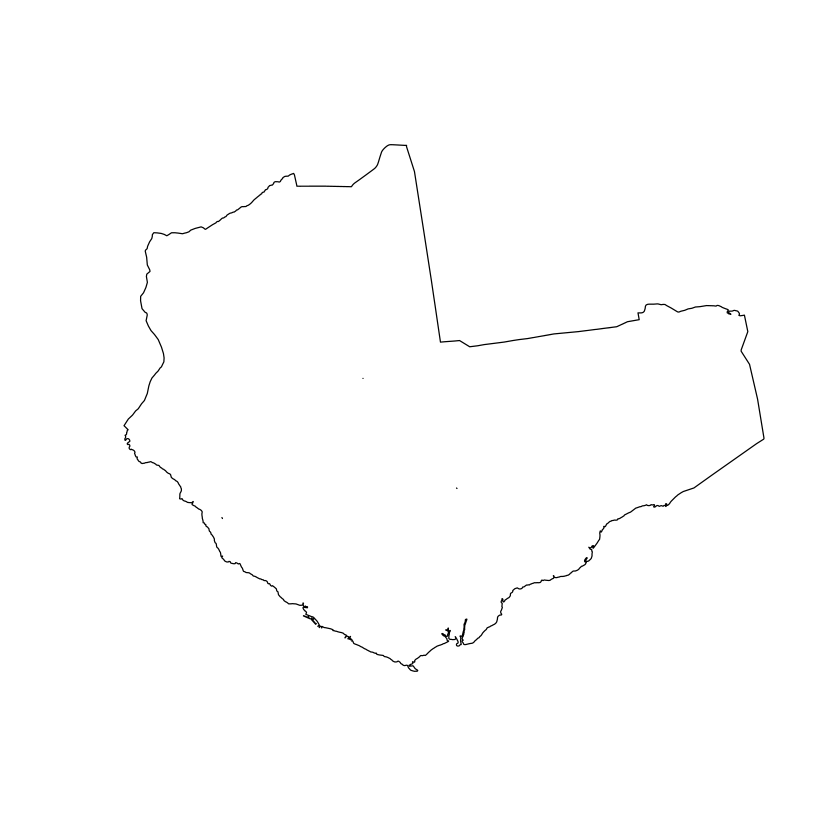

In [13]:

manaus_map <- sf::st_transform(manaus_map, crs = sf::st_crs(manaus_landsat_rast)) 
map <- sf::st_union(manaus_map) |> sf::st_sf()
plot(map)

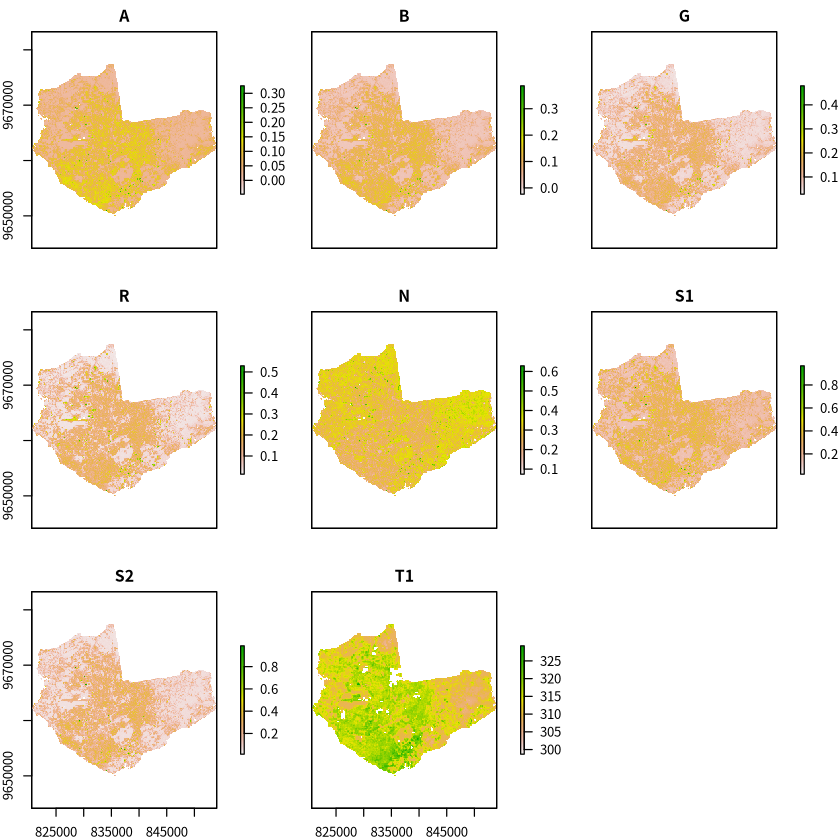

In [14]:

##--obtendo a mascara do manaus_landsat_rast--##
manaus_landsat_rast <- mask(manaus_landsat_rast, map)
plot(manaus_landsat_rast)

In [15]:

##--salvando a imagem--##
writeRaster(manaus_landsat_rast, filename = "/home/huguinho/Documents/GitHub/introduction_to_geo_statistics/aula_06/manaus_landsat_mask.tif", format = "GTiff", overwrite = TRUE)

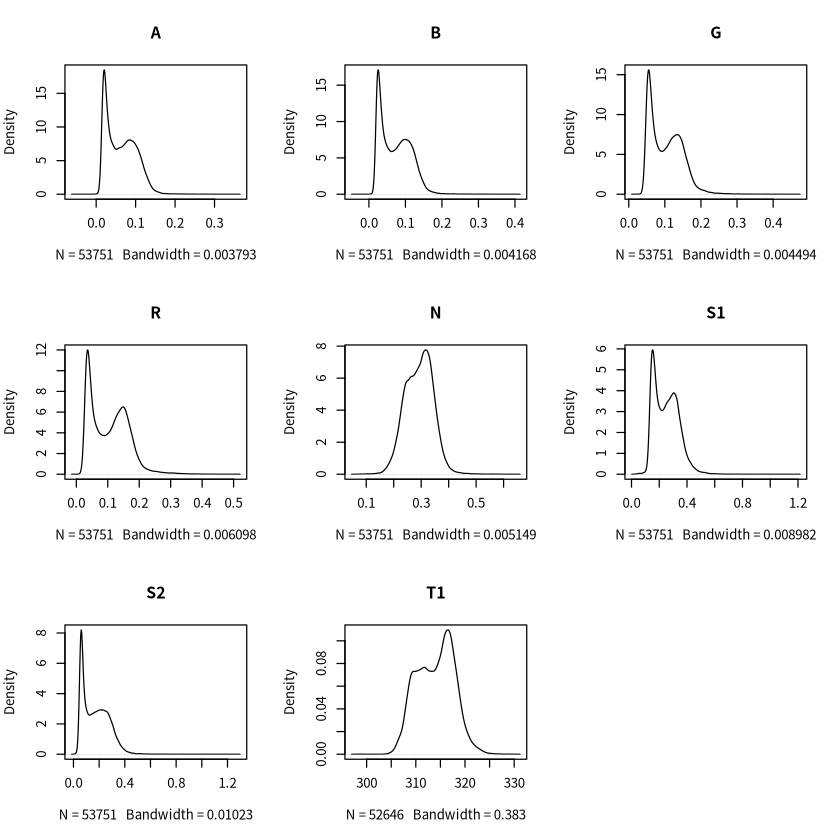

In [16]:

##--obtendo a densidade (distribuição e probabilidade da imagem)
density(manaus_landsat_rast)

In [17]:


##--construindo um objeto raster no pacote raster--##
raster_r = raster(nrows = 100, ncols = 100, 
                  xmn = -100, xmx = 100, ymn = -100, ymx = 100,
                  vals = runif(10000), crs = 4326)

In [18]:

##--Obtendo a resolução de um raster: use o comando res(nome do raster)
#-exemplo
res(raster_r)

[1] 2 2

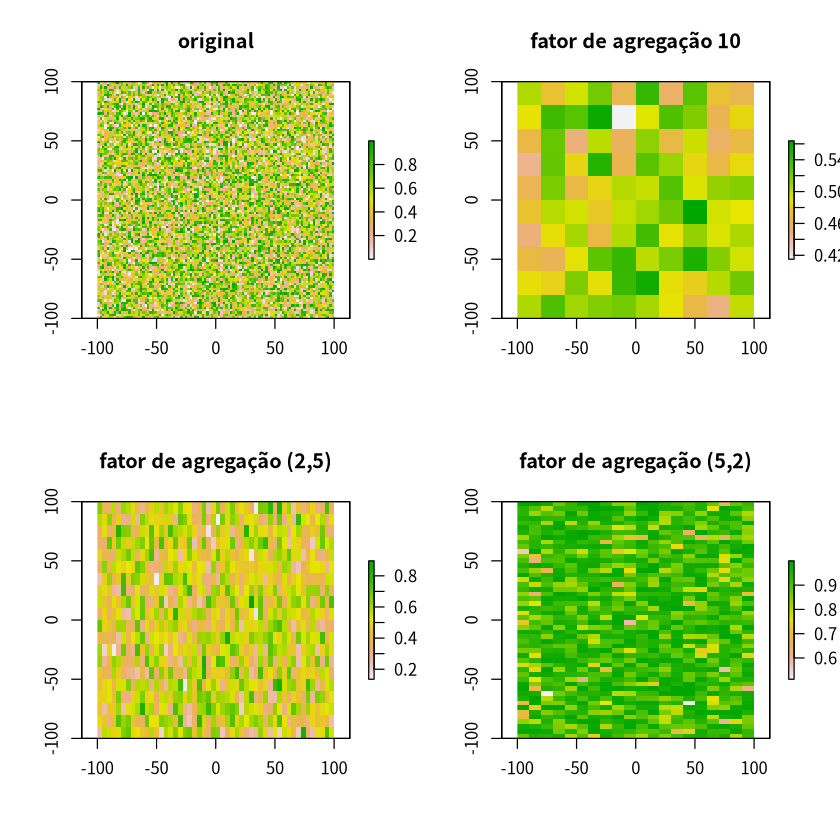

In [19]:

##--Agregação em um raster - Aumentar o tamanho do pixel
#- A agregação agrupa áreas retangulares para criar 
#- células maiores. O valor das células resultantes é calculado com uma função 
#- especificada pelo usuário.
#-exemplo
par(mfrow=c(2,2))
plot(raster_r, main = "original")
raster_agreg_10_mean <- raster::aggregate(x = raster_r, fact = 10, fun = "mean")
plot(raster_agreg_10_mean, main = "fator de agregação 10")
raster_agreg_10_median_2_5 <- raster::aggregate(x = raster_r, fact = c(2,5), fun = "median") 
plot(raster_agreg_10_median_2_5, main = "fator de agregação (2,5)")
raster_agreg_10_max_5_2 <- raster::aggregate(x = raster_r, fact = c(5,2), fun = "max") 
plot(raster_agreg_10_max_5_2, main = "fator de agregação (5,2)")

[1] 0.5 0.5

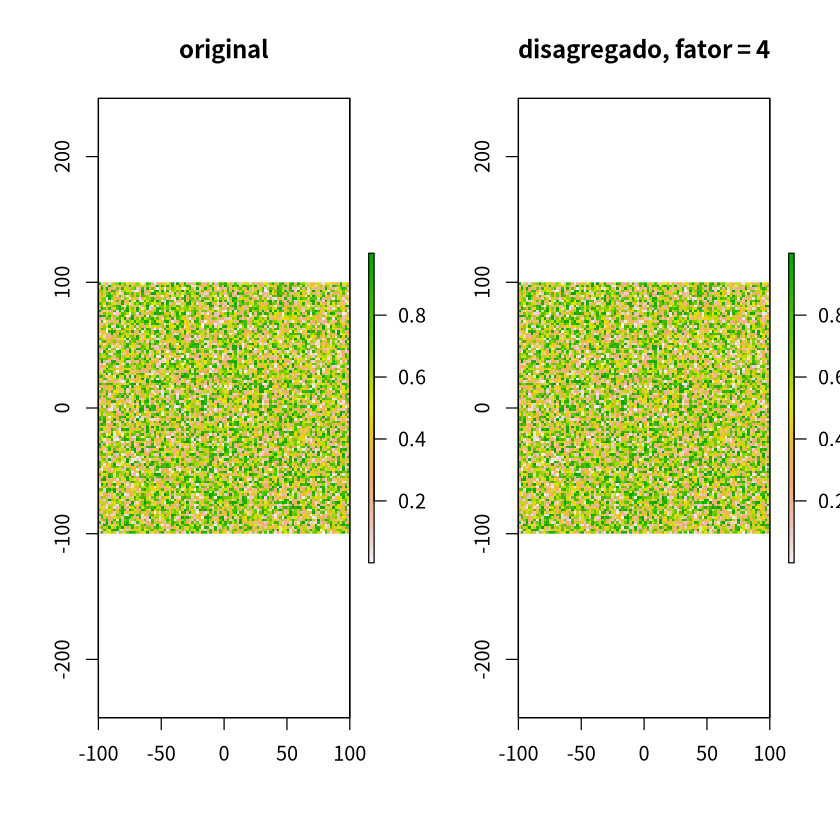

In [20]:

##--Desagregação - Diminuir o tamanho do pixel
#--Desagregar uma RasterLayer para criar um novo 
#--RasterLayer com uma resolução mais alta (células menores).
#--Os valores no novo RasterLayer são os mesmos das células 
#--originais maiores, a menos que você especifique , caso em que os valores são interpolados 
#--localmente (usando a função) method="bilinear".

#-exemplo
raster_disagreg_4 <- raster::disaggregate(raster_r, fact = 4, fun = "bilinear")
res(raster_disagreg_4)

par(mfrow=c(1,2))
plot(raster_r, main = "original")
plot(raster_disagreg_4, main = "disagregado, fator = 4")

In [21]:

##--Selecionado uma amostra aleatória dos valores de celas de um objeto Raste
amostra_selecionada_raster <- sampleRandom(raster_r, size=10, cells=TRUE)
amostra_selecionada_raster

cell layer      
 [1,]  316 0.004802783
 [2,] 6848 0.343491330
 [3,] 2346 0.320757388
 [4,] 2606 0.633217335
 [5,] 5084 0.263644182
 [6,] 2911 0.619032483
 [7,] 5288 0.207179075
 [8,]  595 0.761189859
 [9,] 1273 0.319053769
[10,] 4487 0.962581869

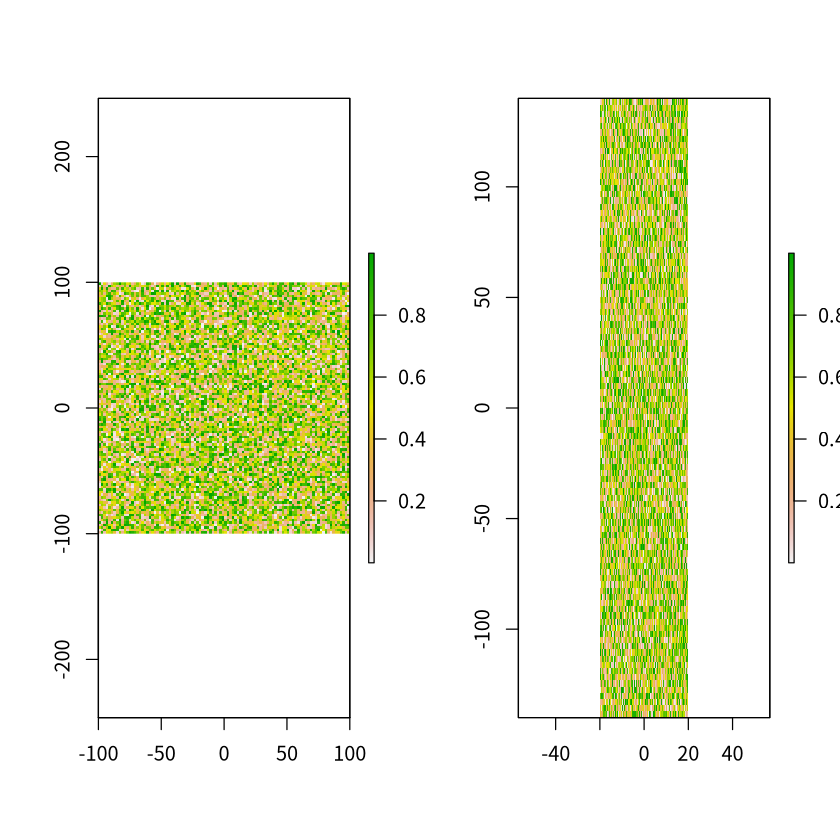

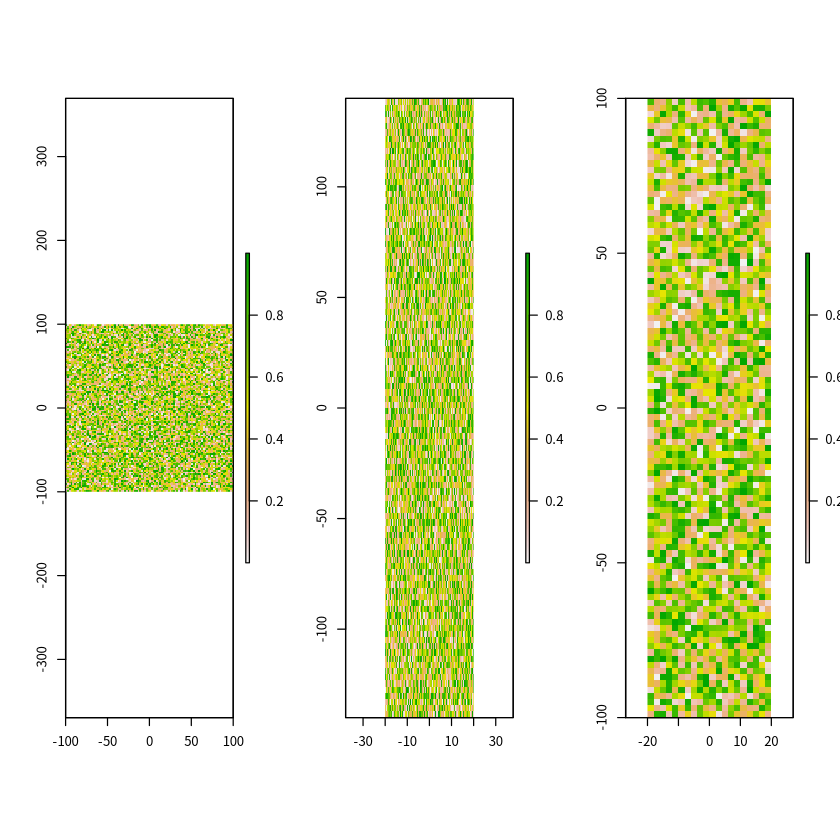

In [22]:

##-- Cortes e extensão em um raster

e <- extent(-20, 20, -20, 40) ## uma sub região 
valores_e <- extract(raster_r,e)

raster_novo = raster(nrows = 100, ncols = 100, 
                  xmn = -20, xmx = 20, ymn = -140, ymx = 140,
                  vals = runif(10000), crs = 4326)

## plot dos raster criados
par(mfrow = c(1,2))
plot(raster_r)
plot(raster_novo)

raster_interseção <- crop(raster_r, raster_novo)
par(mfrow = c(1,3))
plot(raster_r)
plot(raster_novo)
plot(raster_interseção)

Warning message in st_is_longlat(x):
“bounding box has potentially an invalid value range for longlat data”


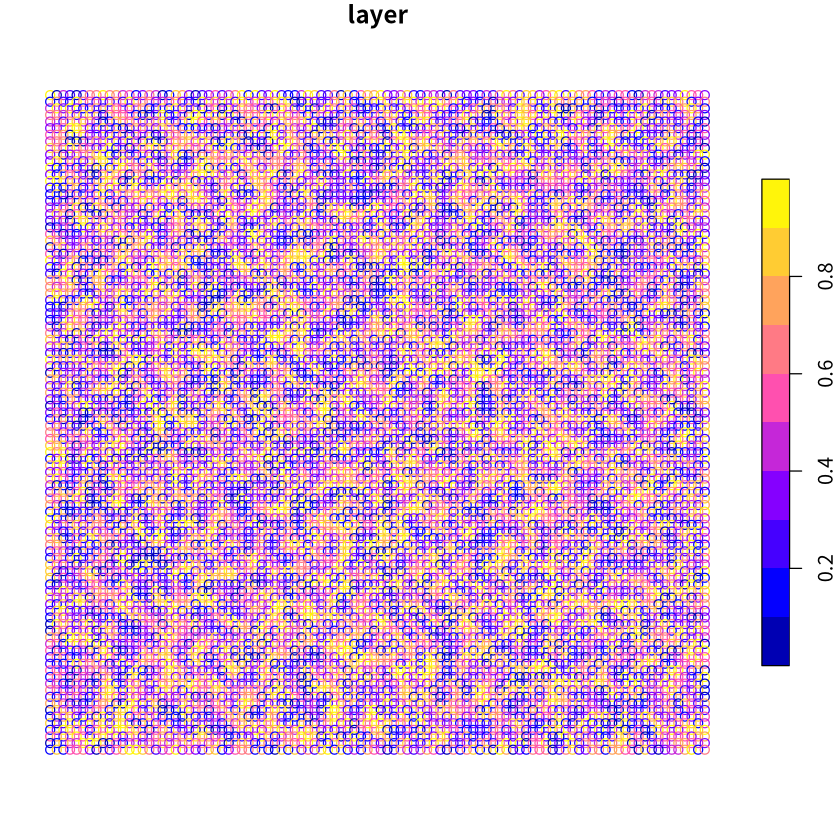

In [23]:

##--Conversão de raster para vetor
#- Vetorização - Raster para pontos
raster_pontos <- raster::rasterToPoints(raster_r, spatial = TRUE) |> sf::st_as_sf()
plot(raster_pontos)

In [24]:

#- Vetorização - Raster para poligonos
rc_rasterizacao_poligonos <- raster::rasterToPolygons(rc) |> sf::st_as_sf()
plot(raster_r)
plot(rc_rasterizacao_poligonos$geom, add = TRUE)  

ERROR: Error in h(simpleError(msg, call)): erro na avaliação do argumento 'x' na seleção do método para a função 'nlayers': 'objeto 'rc' não encontrado'


In [ ]:

##--índices espectrais obtidos via landsat--##
https://www.usgs.gov/landsat-missions/landsat-surface-reflectance-derived-spectral-indices
